In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
import urllib, json

In [4]:
json_url = urllib.request.urlopen('https://api.collegefootballdata.com/teams/fbs?year=2019')
teamInfo = json.loads(json_url.read())
teamInfo = pd.DataFrame(teamInfo)

In [5]:
BigTen = teamInfo[teamInfo.conference == 'SEC'].school

In [6]:
Ranks = pd.read_csv('2019/Ranks.csv',index_col=0)
PCT = pd.read_csv('2019/PCT.csv',index_col=0)

In [7]:
Ranks = Ranks.sort_values('15')

In [8]:
TeamList = Ranks.index

In [9]:
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'

In [10]:
def plotTeamRank(team,show=False):
    plt.figure(figsize=(12,5),facecolor='w')
    # plt.subplot(121)
    plt.gca().invert_yaxis()
    plt.title(team,size=18,fontweight='bold')
#     plt.title('Rankings over the 2019 CFB Season',size=14)
    plt.xlabel('Week',weight='medium')
    plt.ylabel('Rank',weight='medium')
    plt.xticks(fontname = 'NovaMono',weight='medium')
    plt.yticks(fontname = 'NovaMono',weight='medium')
    teamColor = teamInfo[teamInfo.school == team].color.item()
    teamAltColor = teamInfo[teamInfo.school == team].alt_color.item()
    plt.plot(Ranks.loc[team],c=teamColor,label=team,lw=5,
             marker = 'o',markersize=10,markerfacecolor=teamAltColor,markeredgewidth=2.5,markeredgecolor=teamColor)
    plt.tight_layout()
    plt.savefig('2019/Rank Graphs/%s_2019_Ranks.png'%team)
    if show:
        plt.show()
    else:
        plt.close()

In [11]:
for team in TeamList:
    plotTeamRank(team)

/home/mike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: `item` has been deprecated and will be removed in a future version
  # This is added back by InteractiveShellApp.init_path()
/home/mike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: `item` has been deprecated and will be removed in a future version
  if sys.path[0] == '':


/home/mike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: `item` has been deprecated and will be removed in a future version
  # Remove the CWD from sys.path while we load stuff.
/home/mike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: `item` has been deprecated and will be removed in a future version
  if sys.path[0] == '':
/home/mike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: `item` has been deprecated and will be removed in a future version
  del sys.path[0]


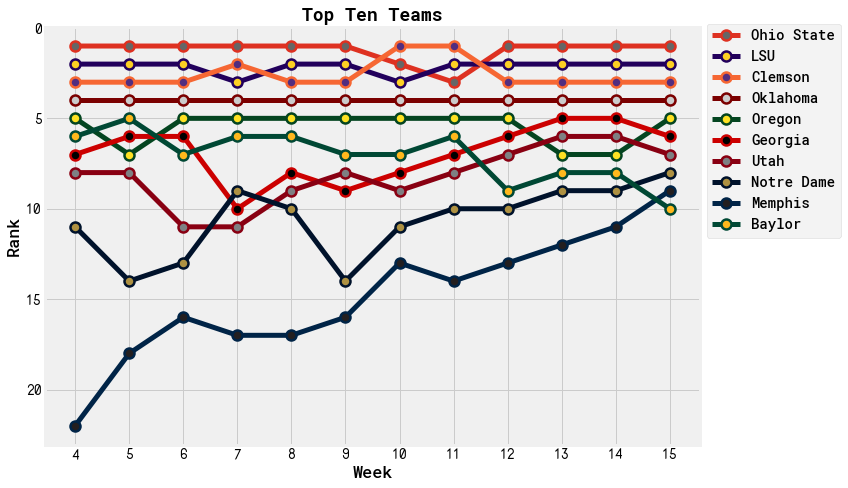

In [25]:
fig = plt.figure(figsize=(12,7),facecolor='w')
# plt.subplot(121)
plt.gca().invert_yaxis()
plt.title('Top Ten Teams',size=18,fontweight='bold')
# plt.title('Rankings over the 2019 CFB Season',size=14)
plt.xlabel('Week',weight='medium')
plt.ylabel('Rank',weight='medium')
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
teamColor = teamInfo[teamInfo.school == team].color.item()
for team in TeamList[:10]:
    teamColor = teamInfo[teamInfo.school == team].color.item()
    teamAltColor = teamInfo[teamInfo.school == team].alt_color.item()
    plt.plot(Ranks.loc[team],c=teamColor,label=team,lw=5,
             marker = 'o',markersize=10,markerfacecolor=teamAltColor,markeredgewidth=2.5,markeredgecolor=teamColor)
plt.legend(bbox_to_anchor=(1, 1.025), loc='upper left', ncol=1)
plt.tight_layout()
plt.savefig('2019/topten.png',facecolor=fig.get_facecolor())
plt.show()

In [41]:
totalRise = Ranks['4'] - Ranks['15']
totalRise = totalRise.sort_values()
biggestRises = totalRise.tail(5)
biggestFalls = totalRise.head(5)

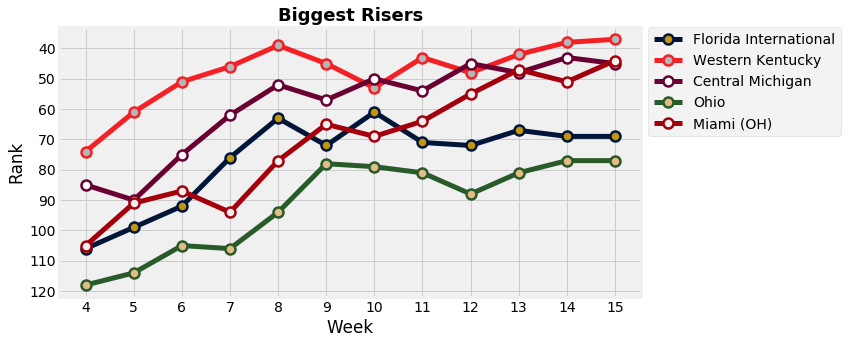

In [42]:
plt.figure(figsize=(12,5),facecolor='w')
# plt.subplot(121)
plt.gca().invert_yaxis()
plt.title('Biggest Risers',size=18,fontweight='bold')
# plt.title('Rankings over the 2019 CFB Season',size=14)
plt.xlabel('Week',weight='medium')
plt.ylabel('Rank',weight='medium')
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
teamColor = teamInfo[teamInfo.school == team].color.item()
for team in biggestRises.index:
    teamColor = teamInfo[teamInfo.school == team].color.item()
    teamAltColor = teamInfo[teamInfo.school == team].alt_color.item()
    plt.plot(Ranks.loc[team],c=teamColor,label=team,lw=5,
             marker = 'o',markersize=10,markerfacecolor=teamAltColor,markeredgewidth=2.5,markeredgecolor=teamColor)
plt.legend(bbox_to_anchor=(1, 1.025), loc='upper left', ncol=1)
plt.tight_layout()
plt.savefig('2019/risers.png')
plt.show()

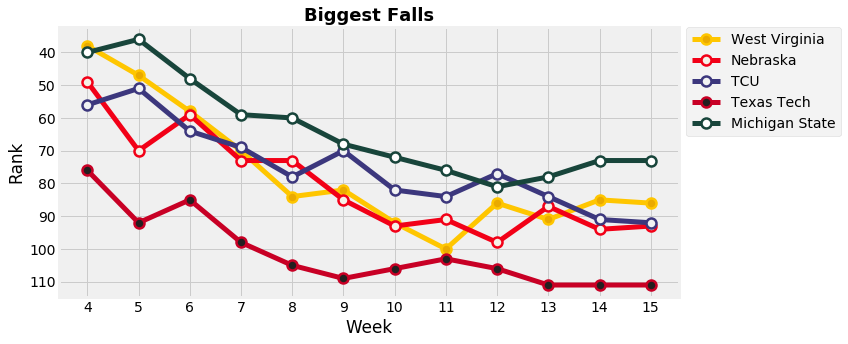

In [43]:
plt.figure(figsize=(12,5),facecolor='w')
# plt.subplot(121)
plt.gca().invert_yaxis()
plt.title('Biggest Falls',size=18,fontweight='bold')
# plt.title('Rankings over the 2019 CFB Season',size=14)
plt.xlabel('Week',weight='medium')
plt.ylabel('Rank',weight='medium')
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
teamColor = teamInfo[teamInfo.school == team].color.item()
for team in biggestFalls.index:
    teamColor = teamInfo[teamInfo.school == team].color.item()
    teamAltColor = teamInfo[teamInfo.school == team].alt_color.item()
    plt.plot(Ranks.loc[team],c=teamColor,label=team,lw=5,
             marker = 'o',markersize=10,markerfacecolor=teamAltColor,markeredgewidth=2.5,markeredgecolor=teamColor)
plt.legend(bbox_to_anchor=(1, 1.025), loc='upper left', ncol=1)
plt.tight_layout()
plt.savefig('2019/falls.png')
plt.show()

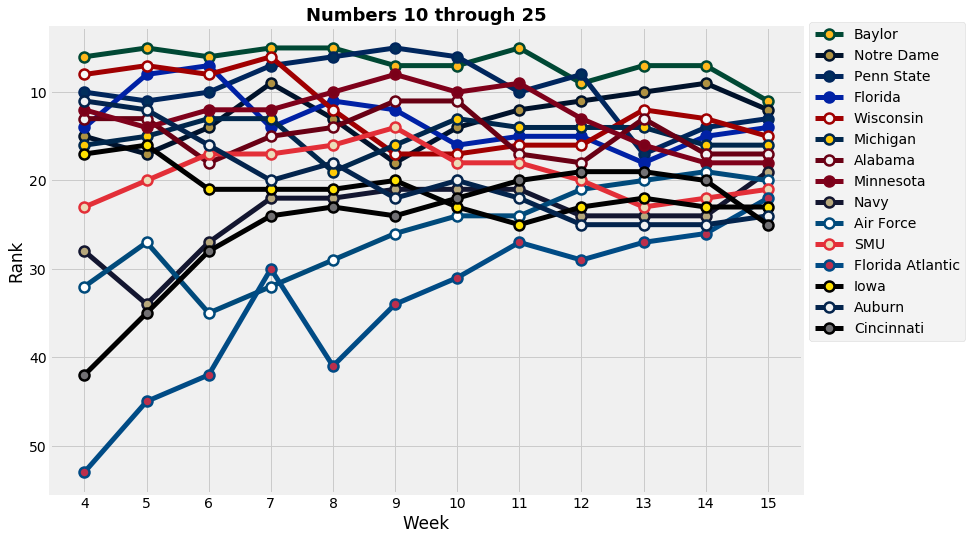

In [44]:
plt.figure(figsize=(12,8),facecolor='w')
# plt.subplot(121)
plt.gca().invert_yaxis()
plt.title('Numbers 10 through 25',size=18,fontweight='bold')
# plt.title('Rankings over the 2019 CFB Season',size=14)
plt.xlabel('Week',weight='medium')
plt.ylabel('Rank',weight='medium')
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
teamColor = teamInfo[teamInfo.school == team].color.item()
for team in TeamList[10:25]:
    teamColor = teamInfo[teamInfo.school == team].color.item()
    teamAltColor = teamInfo[teamInfo.school == team].alt_color.item()
    plt.plot(Ranks.loc[team],c=teamColor,label=team,lw=5,
             marker = 'o',markersize=10,markerfacecolor=teamAltColor,markeredgewidth=2.5,markeredgecolor=teamColor)
plt.legend(bbox_to_anchor=(1, 1.025), loc='upper left', ncol=1)
plt.show()